Mean Median Mode Imputation

In [3]:
import pandas as pd


In [8]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
###% of missing values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [14]:
median=df.Age.median()
median

28.0

In [15]:
impute_nan(df,'Age',median)

In [16]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [22]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [20]:
#get a sample from a column

#1Step1 drop missing values
df['Age'].dropna().sample()



129    45.0
Name: Age, dtype: float64

In [34]:
def impute_nan(df,variable,median):
    df[variable+"_Random_sampling"]=df[variable].fillna(median)
    df[variable+ "_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)    
    ##pandas needs to have same index to merge
    
    random_sample_index=df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(),variable+ '_random']=random_sample

In [35]:
impute_nan(df,'Age',median)

In [36]:
df.head()

,Survived,Age,Fare,Age_Random_sampling,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


Capturing NAN with a new feature

In [37]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)

In [38]:
import numpy as np

In [41]:
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


End of Distribution Imputation

In [42]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

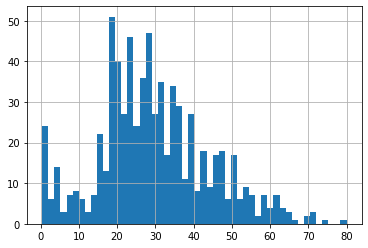

In [44]:
df.Age.hist(bins=50)

In [48]:
extreme=df.Age.mean()+ 3*df.Age.std()

In [47]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [50]:
impute_nan(df,'Age',median,extreme)

In [51]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


Arbitrary value imputation

In [57]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [58]:
def impute_nan(df,variable):
    df[variable+"_zero"]=df[variable].fillna('0')

In [59]:
impute_nan(df,'Age')  

In [60]:
df.head()

,Survived,Age,Fare,Age_zero
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


Frequency Category Imputation:

In [62]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Advanced-House-Price-Prediction/master/train.csv",
              usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice']
              )
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [65]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [68]:
##compute frequency with every category in that column

df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

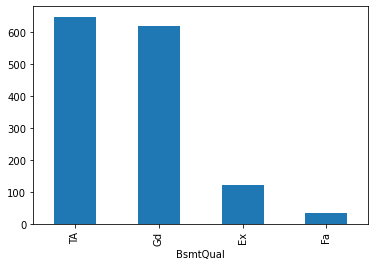

In [71]:
## you can also plot every category of a column 
##here you see that TA is the most occuring one
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [78]:

    
#Replacing Function
def impute_nan(df,variable):
    most_frequent_category= df[variable].value_counts().index[0]
    df[variable]=df[variable].fillna(most_frequent_category,inplace=True)

In [79]:

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [75]:
df.isnull().sum()

BsmtQual       1460
FireplaceQu    1460
GarageType     1460
SalePrice         0
dtype: int64

Make NAN as a new category

In [80]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Advanced-House-Price-Prediction/master/train.csv",
              usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice']
              )
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [81]:
def impute_nan(df,variable):
    df[variable+"new_var"]=np.where(df[variable].isnull(),"Missing",df[variable])
    

In [83]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [84]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
